In [2]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Text(0, 0.5, 'Feature 1')

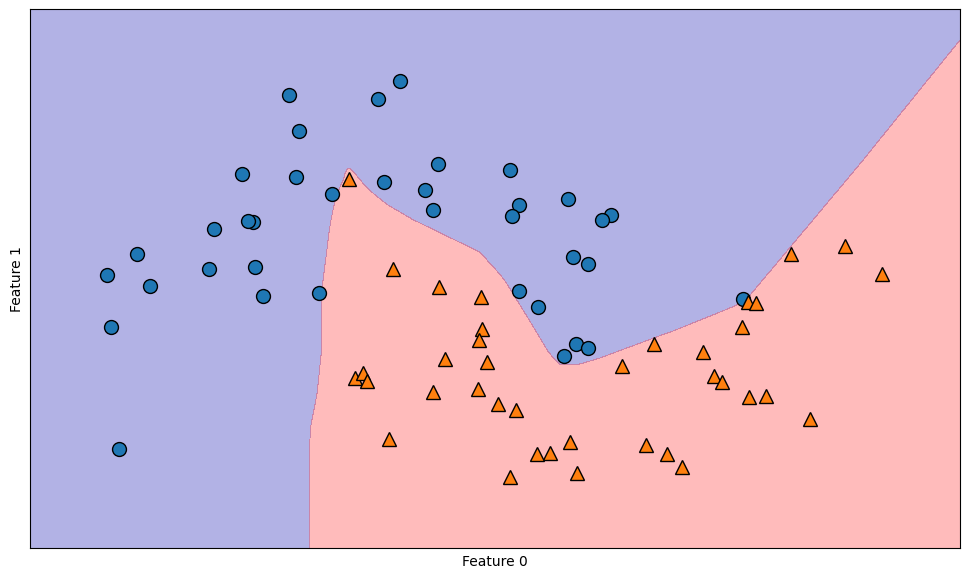

In [11]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

plt.figure(figsize=(12, 7))
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

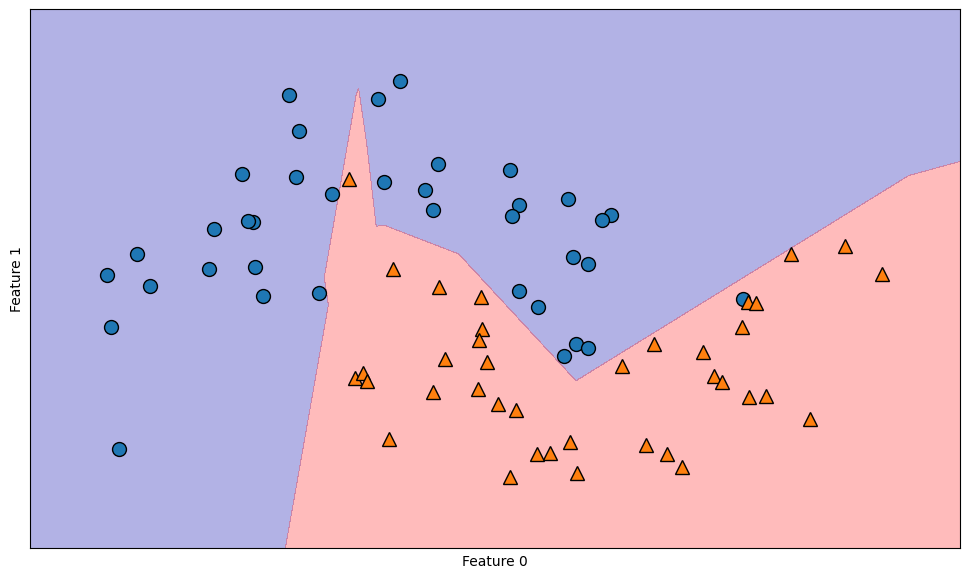

In [12]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10], random_state=0, max_iter=100000).fit(X_train, y_train)

plt.figure(figsize=(12, 7))
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

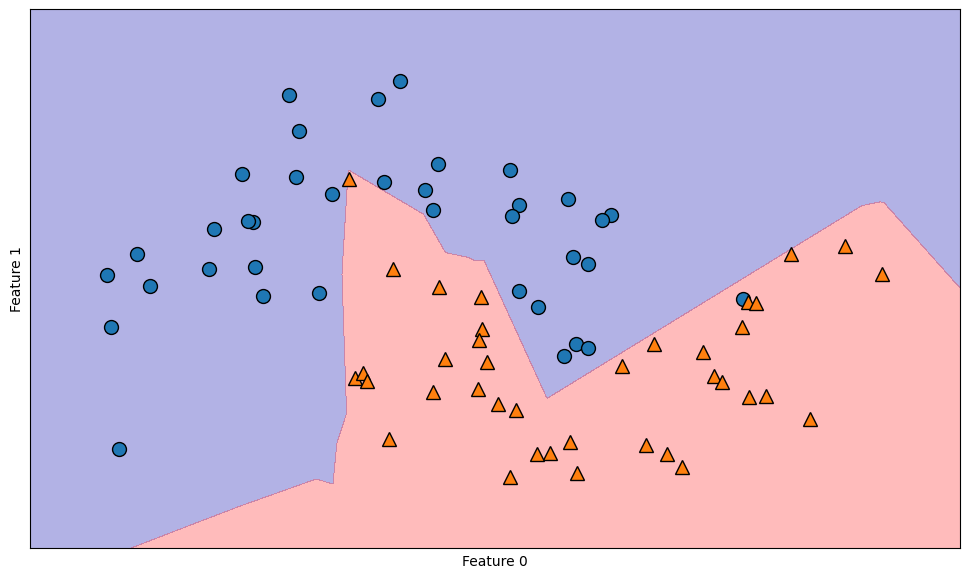

In [ ]:
# using 2 hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10, 10], random_state=0).fit(X_train, y_train)

plt.figure(figsize=(12, 7))
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

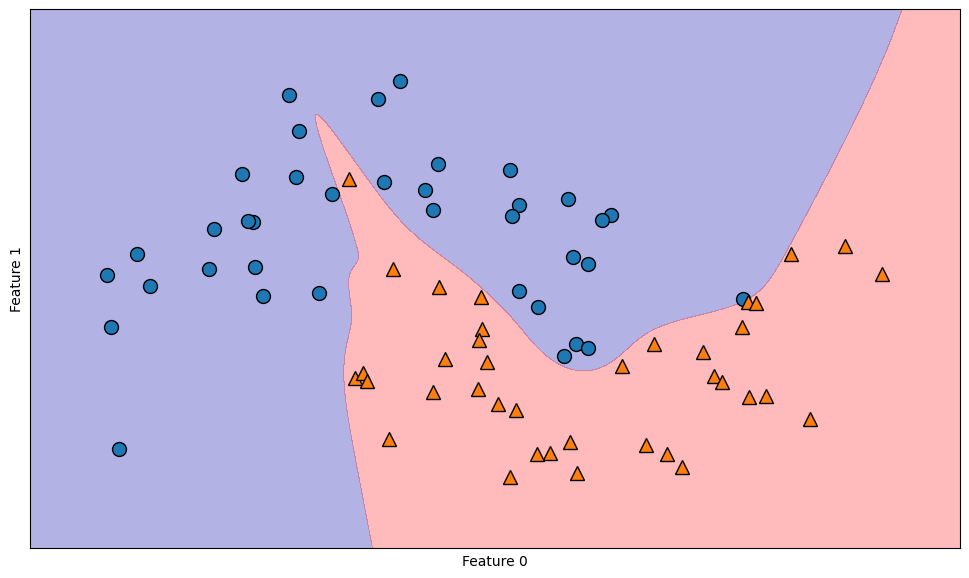

In [16]:
# using 2 hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10, 10], activation='tanh', random_state=0, max_iter=100000).fit(X_train, y_train)

plt.figure(figsize=(12, 7))
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

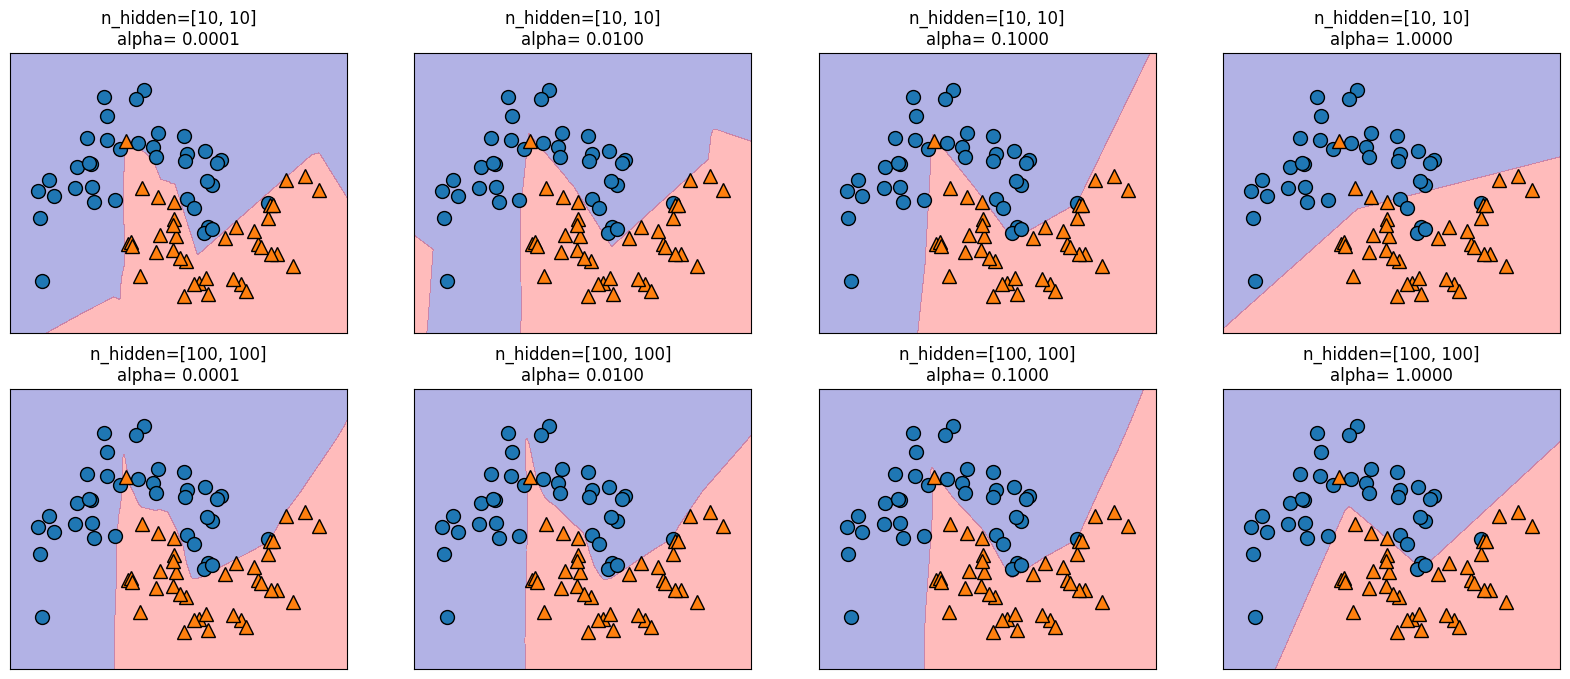

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha, random_state=0, max_iter=100000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={: .4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

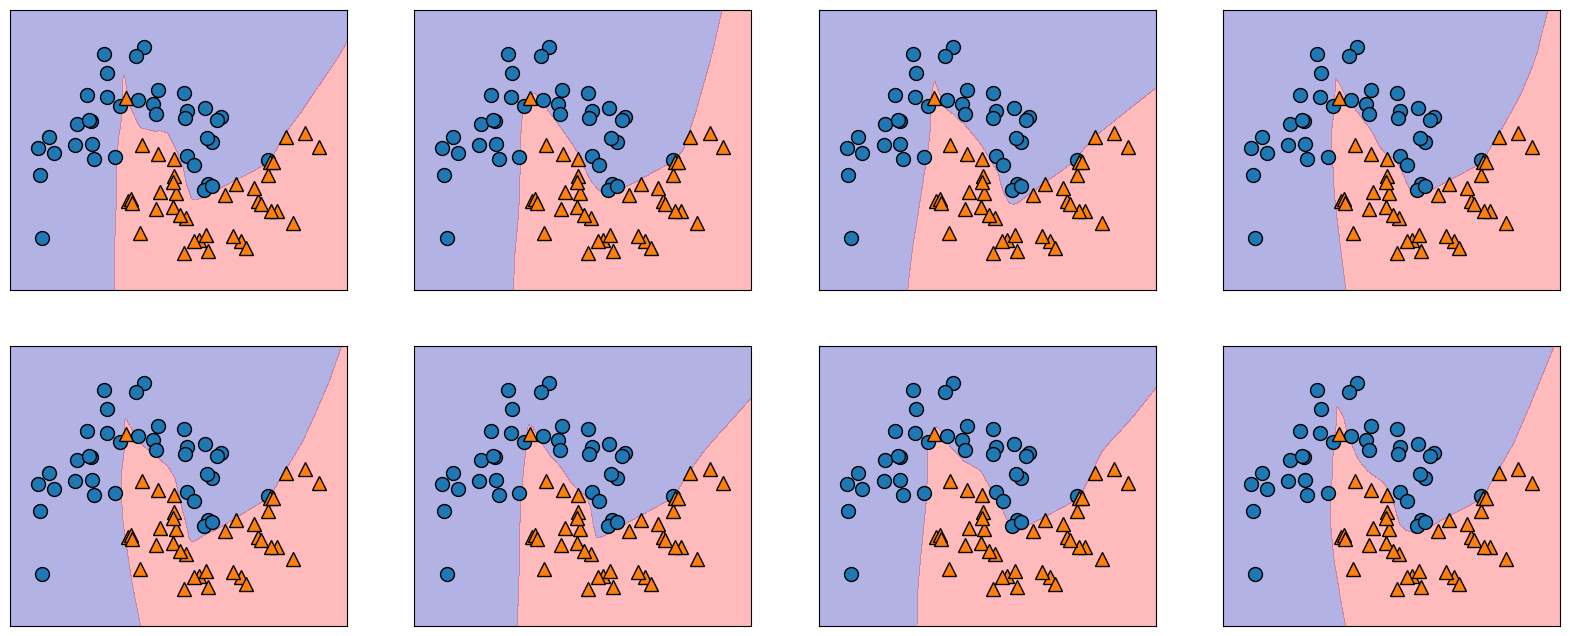

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100], max_iter=10000)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,ax=ax)


## BSC Dataset

To understand how MLP works on real world data let's apply it to bsc dataset.

In [21]:
from sklearn.datasets import load_breast_cancer
bsc = load_breast_cancer()

In [24]:
print("Cancer data per-feature maxima: \n{}".format(bsc.data.max(axis=0)))

Cancer data per-feature maxima: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

mlp = MLPClassifier(random_state=42, max_iter=10000)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 1.00


**Scaling Data**

Neural Networks also expect all input features to vary in similar way, and ideally have mean of 0, and variance of 1. Therefore, we scale our data. 

In [30]:
# Compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# Compute standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [33]:
mlp = MLPClassifier(random_state=42, max_iter=100000)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 1.00


In [37]:
# We increase the alpha parameter to 1 from 0.0001 to add stronger regularization of weights.

mlp = MLPClassifier(alpha=1, random_state=42, max_iter=10000)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.85
Accuracy on test set: 0.84


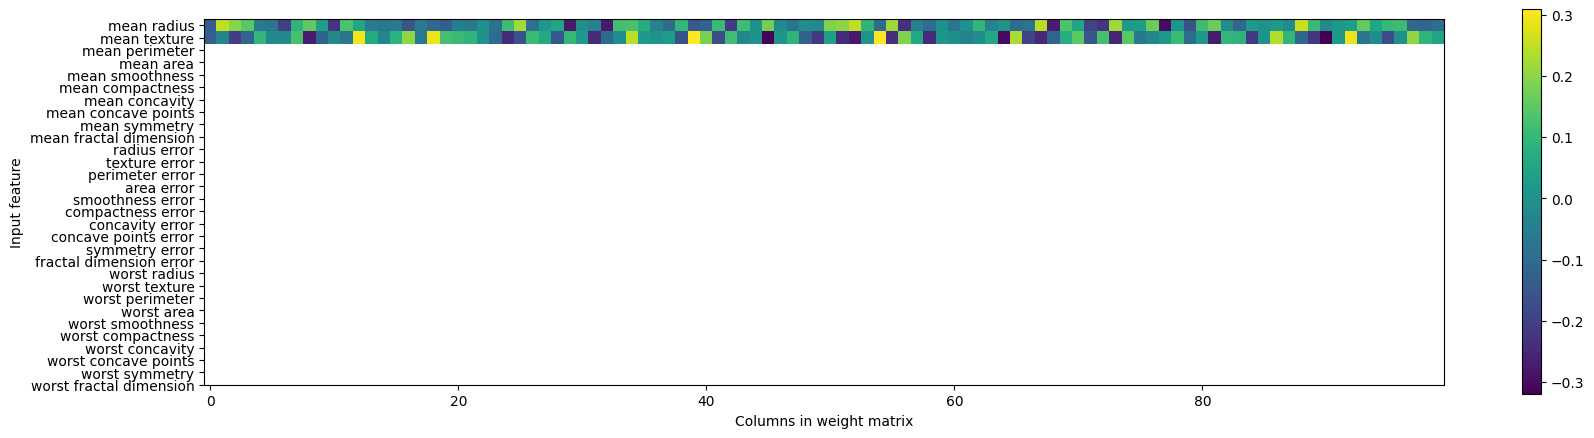

In [38]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), bsc.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()